In [1]:
%load_ext autoreload
%autoreload 2

In [2]:
import ghibtools as gh
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import seaborn as sns
import pingouin
from compute_global_dataframes import resp_features_concat_job, rsa_concat_job, hrv_concat_job, relaxation_concat_job
from params import *
import physio
from configuration import base_folder, base_cmo
import os
from bibliotheque import df_baseline

# PARAMS

In [3]:
save_folder = base_folder / 'Figures' / 'responders'
rename_col = {'session':'experimental block'}

# TWO POPULATIONS ? RESPONDERS AND NON-RESPONDERS

In [4]:
resp = resp_features_concat_job.get(global_key).to_dataframe()
resp = resp.rename(columns = rename_col)

In [5]:
df_bis = resp.groupby(['participant','experimental block']).mean(True).reset_index()

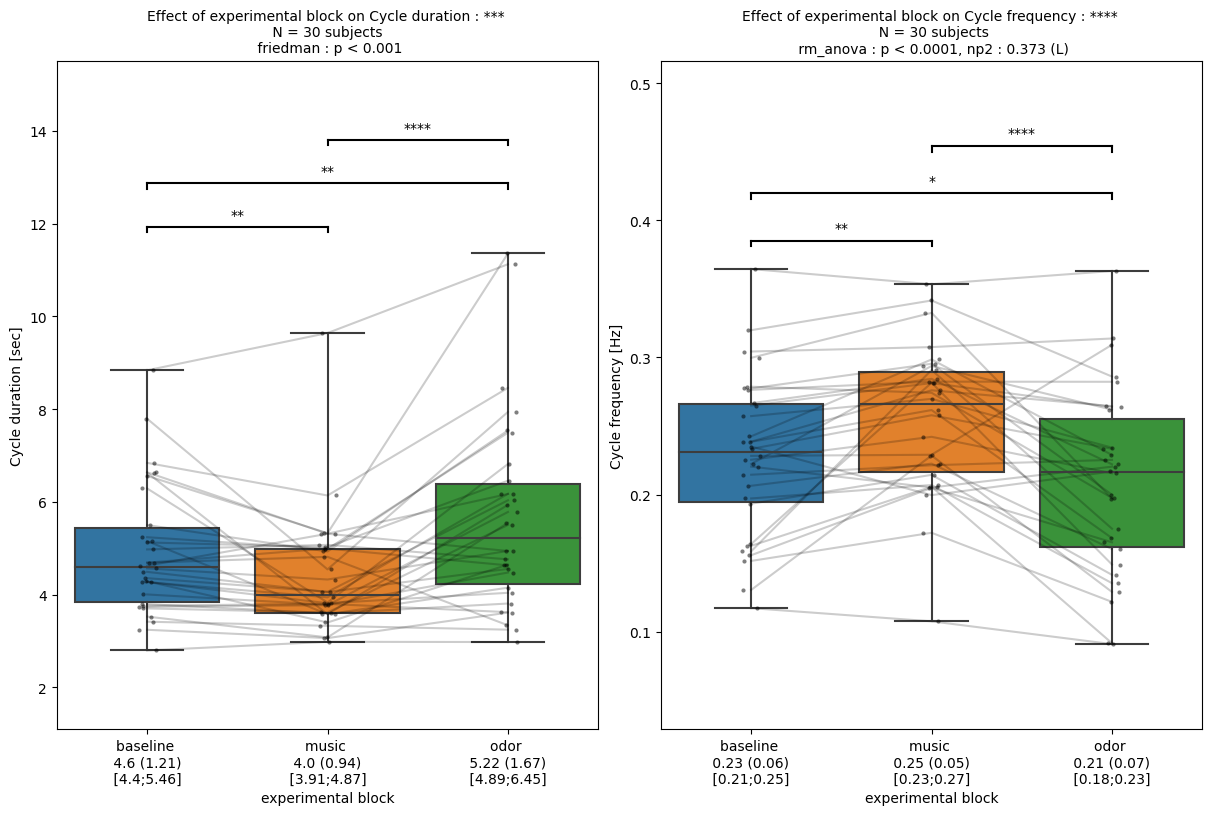

In [6]:
fig, axs = plt.subplots(ncols = 2, figsize = (12,8), constrained_layout = True)

ax = axs[0]
gh.auto_stats(df = df_bis, 
              ax=ax,
              predictor = 'experimental block', 
              outcome = 'cycle_duration', 
              design = 'within',
              subject = 'participant', 
             outcome_clean_label = 'Cycle duration',
             outcome_unit = 'sec',
             strip = True,
             lines = True,
             xtick_info = True)

ax = axs[1]
gh.auto_stats(df = df_bis, 
              ax=ax,
              predictor = 'experimental block', 
              outcome = 'cycle_freq', 
              design = 'within',
              subject = 'participant', 
             outcome_clean_label = 'Cycle frequency',
             outcome_unit = 'Hz',
             strip = True,
             lines = True,
             xtick_info = True)


fig.savefig(save_folder / 'cycle_freq_vs_duration.png', dpi = 500, bbox_inches = 'tight')

In [7]:
study = df_bis[['participant','experimental block','cycle_freq']]
mask_music_increase = pd.Series(study[study['experimental block'] == 'music']['cycle_freq'].values - study[study['experimental block'] == 'baseline']['cycle_freq'].values, index = study['participant'].unique()) > 0
mask_odor_decrease = pd.Series(study[study['experimental block'] == 'odor']['cycle_freq'].values - study[study['experimental block'] == 'baseline']['cycle_freq'].values, index = study['participant'].unique()) < 0
mask = mask_music_increase & mask_odor_decrease

In [8]:
repondeurs = list(mask.index[mask])
non_repondeurs = list(mask.index[~mask])
mapper_responder = {sub:'responder' if sub in repondeurs else 'non-responder' for sub in mask.index}

In [9]:
pd.Series(mapper_responder).value_counts()

responder        16
non-responder    14
Name: count, dtype: int64

In [10]:
mapper_responder

{'P01': 'non-responder',
 'P02': 'responder',
 'P03': 'non-responder',
 'P04': 'responder',
 'P05': 'responder',
 'P06': 'responder',
 'P07': 'responder',
 'P08': 'responder',
 'P09': 'non-responder',
 'P10': 'responder',
 'P11': 'responder',
 'P12': 'non-responder',
 'P13': 'non-responder',
 'P14': 'responder',
 'P15': 'non-responder',
 'P16': 'non-responder',
 'P17': 'non-responder',
 'P18': 'responder',
 'P19': 'non-responder',
 'P20': 'responder',
 'P21': 'non-responder',
 'P23': 'non-responder',
 'P24': 'non-responder',
 'P25': 'responder',
 'P26': 'responder',
 'P27': 'responder',
 'P28': 'responder',
 'P29': 'non-responder',
 'P30': 'responder',
 'P31': 'non-responder'}

In [11]:
df_bis['is_responder'] = df_bis['participant'].map(mapper_responder)

In [12]:
df_bis

,participant,experimental block,inspi_index,expi_index,next_inspi_index,inspi_time,expi_time,next_inspi_time,cycle_duration,inspi_duration,...,inspi_amplitude,expi_amplitude,total_volume,artifact,stai_state,stai_trait,Maia_Mean,OAS,BMRQ,is_responder
0,P01,baseline,295355.323944,296315.267606,298150.769953,295.355324,296.315268,298.150770,2.795446,0.959944,...,103.253979,51.054834,93.189448,0.098592,40.0,61.0,1.019643,2.666667,2.727273,non-responder
1,P01,music,298572.765000,299636.555000,301555.360000,298.572765,299.636555,301.555360,2.982595,1.063790,...,92.505867,34.956457,79.618824,0.160000,40.0,61.0,1.019643,2.666667,2.727273,non-responder
2,P01,odor,302365.170000,303379.540000,305342.805000,302.365170,303.379540,305.342805,2.977635,1.014370,...,113.346064,30.353593,90.599419,0.165000,40.0,61.0,1.019643,2.666667,2.727273,non-responder
3,P02,baseline,306048.542553,308661.765957,312339.723404,306.048543,308.661766,312.339723,6.291181,2.613223,...,105.356333,94.962771,314.879278,0.191489,24.0,37.0,3.354762,3.066667,3.000000,responder
4,P02,music,286695.205128,288219.320513,290524.750000,286.695205,288.219321,290.524750,3.829545,1.524115,...,132.037495,108.931718,251.268901,0.384615,24.0,37.0,3.354762,3.066667,3.000000,responder
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
85,P30,music,294211.977143,295604.908571,297611.274286,294.211977,295.604909,297.611274,3.399297,1.392931,...,156.690015,160.753554,287.556252,0.080000,25.0,29.0,3.071131,2.966667,3.045455,responder
86,P30,odor,334061.562500,336237.601562,338708.820312,334.061562,336.237602,338.708820,4.647258,2.176039,...,120.611515,129.905541,325.265440,0.156250,25.0,29.0,3.071131,2.966667,3.045455,responder
87,P31,baseline,318818.550388,321000.294574,323443.395349,318.818550,321.000295,323.443395,4.624845,2.181744,...,173.998595,91.881113,361.354954,0.155039,29.0,40.0,2.790774,2.933333,2.681818,non-responder
88,P31,music,308114.234234,310580.297297,313427.459459,308.114234,310.580297,313.427459,5.313225,2.466063,...,256.460895,76.040818,482.886398,0.207207,29.0,40.0,2.790774,2.933333,2.681818,non-responder


<AxesSubplot: xlabel='experimental block', ylabel='cycle_freq'>

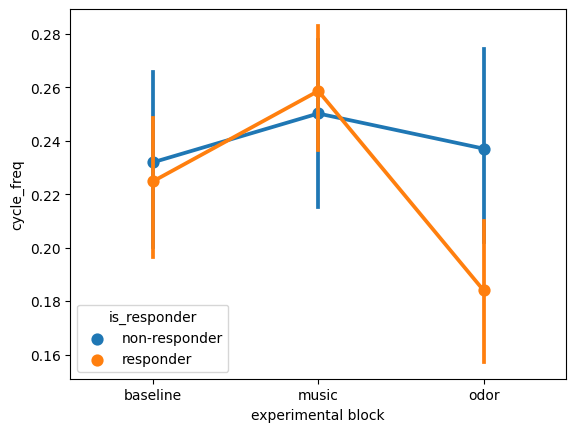

In [13]:
sns.pointplot(data = df_bis, x = 'experimental block', y = 'cycle_freq', hue = 'is_responder')

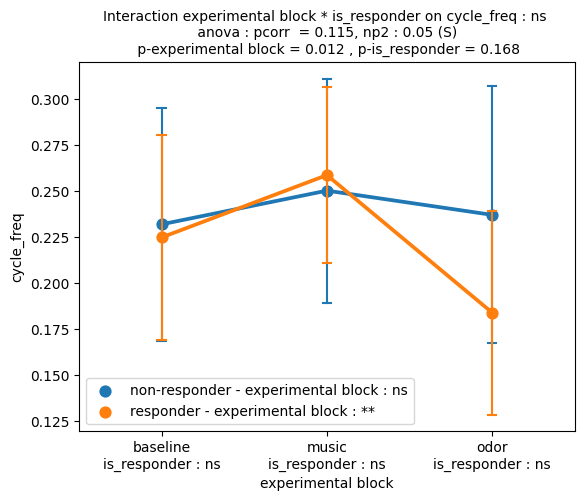

In [14]:
fig, ax = plt.subplots()

gh.auto_stats(df = df_bis,
              ax=ax,
              predictor = ['experimental block','is_responder'],
              outcome = 'cycle_freq', 
              design = 'between',
              subject = 'participant'
             )

fig.savefig(save_folder / 'effet_responders_sur_respi.png', dpi = 500, bbox_inches = 'tight')

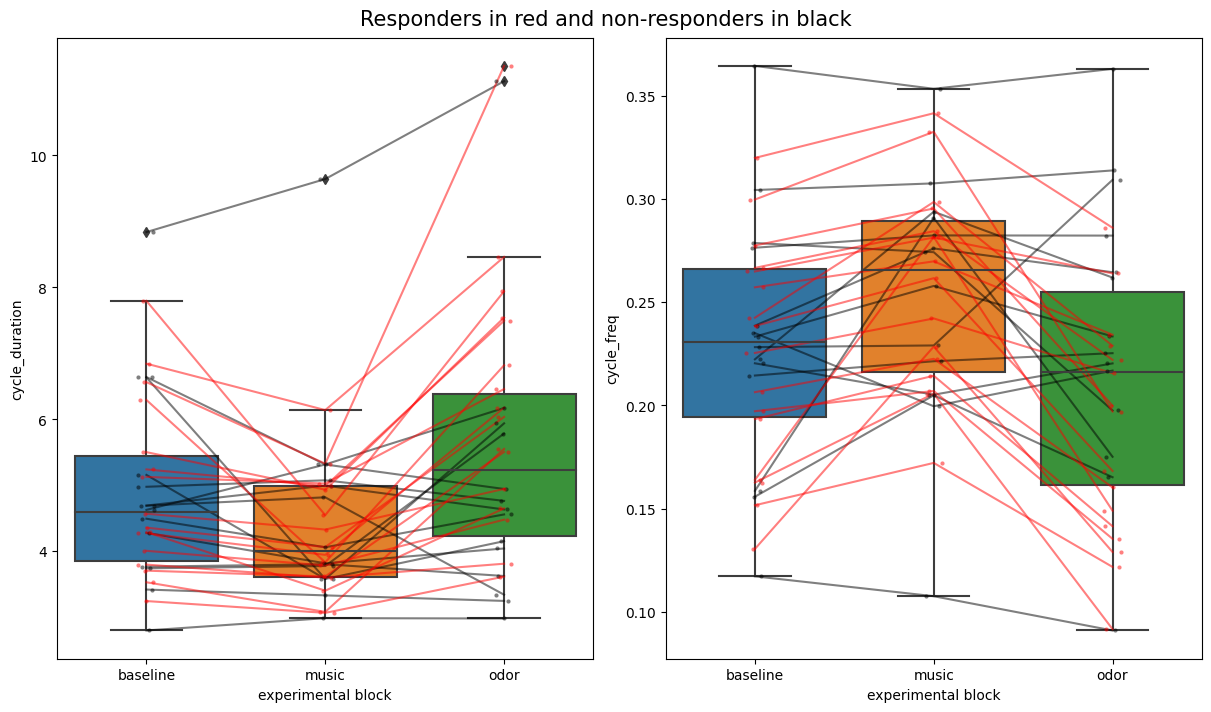

In [15]:
fig , axs = plt.subplots(ncols = 2, figsize = (12,7), constrained_layout = True)
fig.suptitle('Responders in red and non-responders in black', fontsize = 15)


for c, metric in enumerate(['cycle_duration','cycle_freq']):
    ax = axs[c]
    sns.boxplot(data = df_bis, x = 'experimental block', y = metric, ax=ax)

    colors = {'responder':'r', 'non-responder':'k'}
    
    for is_rep in df_bis['is_responder'].unique():
        palette = [colors[is_rep]] * df_bis[df_bis['is_responder'] == is_rep]['participant'].unique().size
        sns.stripplot(data = df_bis[df_bis['is_responder'] == is_rep], x = 'experimental block', y =metric, ax=ax, color = colors[is_rep], size = 3, jitter = 0.05, alpha = 0.5)
        sns.lineplot(data = df_bis[df_bis['is_responder'] == is_rep], x = 'experimental block', y =metric, hue = 'participant', ax=ax,palette = palette, alpha = 0.5)
        legend = ax.legend()
        legend.remove()
                                             
fig.savefig(save_folder / 'boxplots_rep_no_rep_respi.png', dpi = 500, bbox_inches = 'tight')

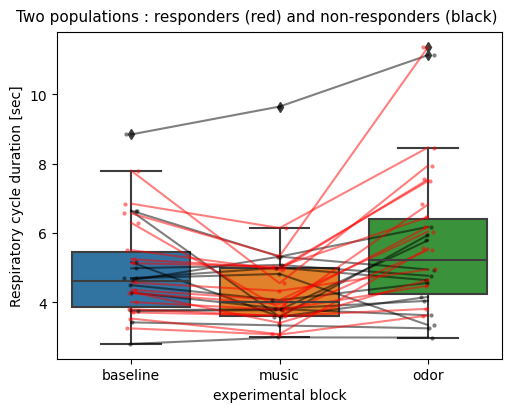

In [16]:
metric = 'cycle_duration'

fig , ax = plt.subplots(figsize = (5,4), constrained_layout = True)
fig.suptitle('Two populations : responders (red) and non-responders (black)', fontsize = 11)

sns.boxplot(data = df_bis, x = 'experimental block', y = metric, ax=ax)

colors = {'responder':'r', 'non-responder':'k'}

for is_rep in df_bis['is_responder'].unique():
    palette = [colors[is_rep]] * df_bis[df_bis['is_responder'] == is_rep]['participant'].unique().size
    sns.stripplot(data = df_bis[df_bis['is_responder'] == is_rep], x = 'experimental block', y =metric, ax=ax, color = colors[is_rep], size = 3, jitter = 0.05, alpha = 0.5)
    sns.lineplot(data = df_bis[df_bis['is_responder'] == is_rep], x = 'experimental block', y =metric, hue = 'participant', ax=ax,palette = palette, alpha = 0.5)
    legend = ax.legend()
    legend.remove()
ax.set_ylabel('Respiratory cycle duration [sec]')
fig.savefig(save_folder / 'two_populations_red_black.png', dpi = 500, bbox_inches = 'tight')

## HRV + RSA + Psycho :  Rep / No rep

### HRV

In [17]:
hrv = hrv_concat_job.get(global_key).to_dataframe()
hrv['is_responder'] = df_bis['participant'].map(mapper_responder)
hrv = hrv.rename(columns = rename_col)

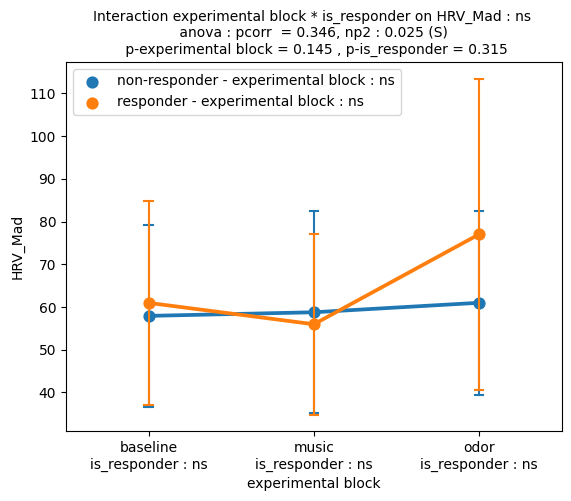

In [18]:
fig, ax = plt.subplots()

gh.auto_stats(df = hrv,
              ax=ax,
              predictor = ['experimental block','is_responder'],
              outcome = 'HRV_Mad', 
              design = 'between',
              subject = 'participant'
             )

fig.savefig(save_folder / 'effet_responders_sur_HRV.png', dpi = 500, bbox_inches = 'tight')

### RSA

In [19]:
rsa = rsa_concat_job.get(global_key).to_dataframe()
rsa = rsa.rename(columns = rename_col)
rsa = rsa.groupby(['participant','experimental block']).median(True).reset_index()
rsa['is_responder'] = df_bis['participant'].map(mapper_responder)


In [20]:
rsa

,participant,experimental block,peak_index,trough_index,peak_time,trough_time,peak_value,trough_value,rising_amplitude,decay_amplitude,rising_duration,decay_duration,rising_slope,decay_slope,stai_state,stai_trait,Maia_Mean,OAS,BMRQ,is_responder
0,P01,baseline,2993.0,3007.0,299.3130,300.7130,86.714163,82.792616,3.768560,3.829268,1.1345,1.50,2.929955,2.597615,40.0,61.0,1.019643,2.666667,2.727273,non-responder
1,P01,music,3016.5,3030.5,301.7140,303.1140,83.910902,80.030339,3.572436,3.586949,1.3610,1.50,2.538447,2.514716,40.0,61.0,1.019643,2.666667,2.727273,non-responder
2,P01,odor,2995.5,3013.0,299.5840,301.3340,81.541600,77.209442,3.904454,3.532254,1.4110,1.45,2.749728,2.601323,40.0,61.0,1.019643,2.666667,2.727273,non-responder
3,P02,baseline,3172.5,3190.0,317.3165,319.0665,92.036706,70.585770,19.668615,20.217852,3.5130,2.80,5.833946,7.331331,24.0,37.0,3.354762,3.066667,3.000000,responder
4,P02,music,2806.0,2822.0,280.6380,282.2380,85.950638,75.508218,9.846101,10.017317,1.8210,2.00,5.363314,5.708185,24.0,37.0,3.354762,3.066667,3.000000,responder
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
85,P30,music,2966.0,2984.0,296.6990,298.4990,66.582222,63.588428,2.974849,2.829453,1.3165,1.80,2.042907,1.710240,25.0,29.0,3.071131,2.966667,3.045455,responder
86,P30,odor,3507.0,3529.5,350.7435,352.9935,65.222211,61.507596,3.408852,3.419358,2.0840,2.00,1.585456,1.678314,25.0,29.0,3.071131,2.966667,3.045455,responder
87,P31,baseline,3357.0,3379.0,335.7750,337.9750,77.091564,70.775628,5.841886,5.280174,2.4525,2.20,2.488835,2.696350,29.0,40.0,2.790774,2.933333,2.681818,non-responder
88,P31,music,3153.0,3178.0,315.3110,317.8110,72.713747,65.096112,6.873399,6.261407,2.7830,2.50,2.422154,2.886400,29.0,40.0,2.790774,2.933333,2.681818,non-responder


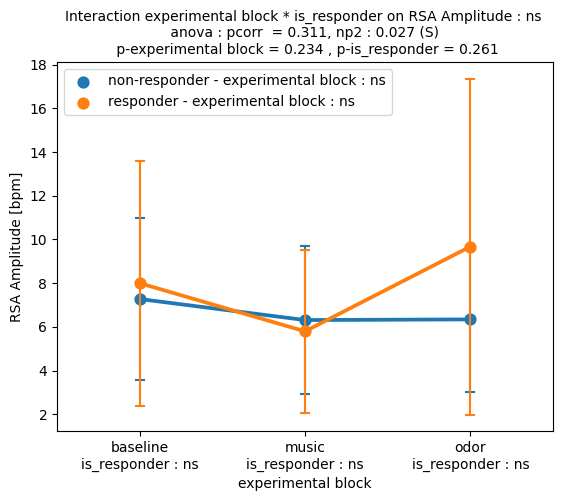

In [21]:
fig, ax = plt.subplots()

gh.auto_stats(df = rsa,
              ax=ax,
              predictor = ['experimental block','is_responder'],
              outcome = 'decay_amplitude', 
              design = 'between',
              subject = 'participant',
              outcome_clean_label = 'RSA Amplitude',
              outcome_unit = 'bpm'
             )

fig.savefig(save_folder / 'effet_responders_sur_RSA.png', dpi = 500, bbox_inches = 'tight')

### Relaxation

In [22]:
relaxation = relaxation_concat_job.get(global_key).to_dataframe()
relaxation['is_responder'] = df_bis['participant'].map(mapper_responder)
relaxation = relaxation.rename(columns = rename_col)

In [23]:
relaxation

,participant,experimental block,stim_name,Arousal,Relaxation,Relaxation_intensity,Perceived_duration,stai_state,stai_trait,Gender,Maia_Mean,OAS,BMRQ,is_responder
dim_0,,,,,,,,,,,,,,
0,P01,baseline,,11,10,4,96,40,61,F,1.019643,2.666667,2.727273,non-responder
1,P01,music,Classique,24,66,61,75,40,61,F,1.019643,2.666667,2.727273,non-responder
2,P01,odor,Fleur d'oranger épicé,13,67,61,87,40,61,F,1.019643,2.666667,2.727273,non-responder
3,P02,baseline,,7,93,95,62,24,37,F,3.354762,3.066667,3.000000,responder
4,P02,music,Classique,35,89,91,59,24,37,F,3.354762,3.066667,3.000000,responder
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
85,P30,music,Electro,86,56,78,55,25,29,M,3.071131,2.966667,3.045455,responder
86,P30,odor,Pêche Lavande,36,93,87,59,25,29,M,3.071131,2.966667,3.045455,responder
87,P31,baseline,,22,75,67,12,29,40,M,2.790774,2.933333,2.681818,non-responder


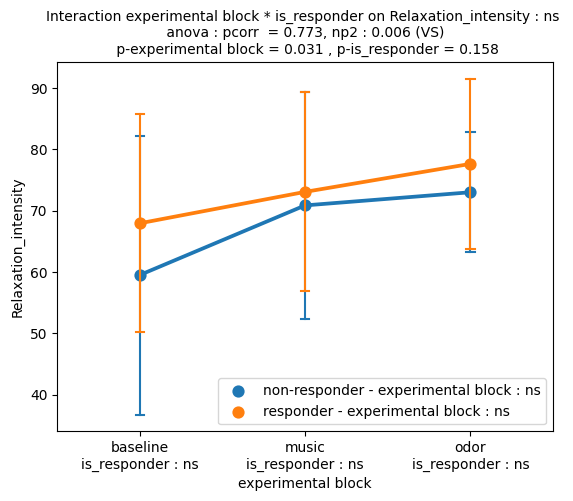

In [24]:
fig, ax = plt.subplots()

gh.auto_stats(df = relaxation,
              ax=ax,
              predictor = ['experimental block','is_responder'],
              outcome = 'Relaxation_intensity', 
              design = 'between',
              subject = 'participant',
             )

fig.savefig(save_folder / 'effet_responders_on_relaxation.png', dpi = 500, bbox_inches = 'tight')

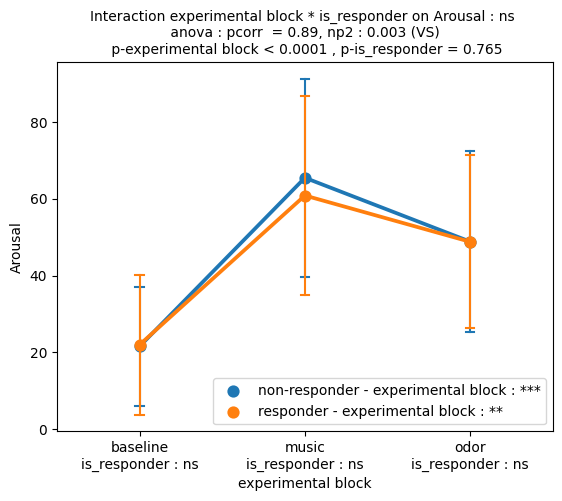

In [25]:
fig, ax = plt.subplots()

gh.auto_stats(df = relaxation,
              ax=ax,
              predictor = ['experimental block','is_responder'],
              outcome = 'Arousal', 
              design = 'between',
              subject = 'participant',
             )

fig.savefig(save_folder / 'effet_responders_on_arousal.png', dpi = 500, bbox_inches = 'tight')

<AxesSubplot: title={'center': 'Interaction experimental block * is_responder on Relaxation : ns \n anova : pcorr  = 0.19, np2 : 0.039 (S) \n p-experimental block = 0.172 , p-is_responder = 0.36'}, xlabel='experimental block', ylabel='Relaxation'>

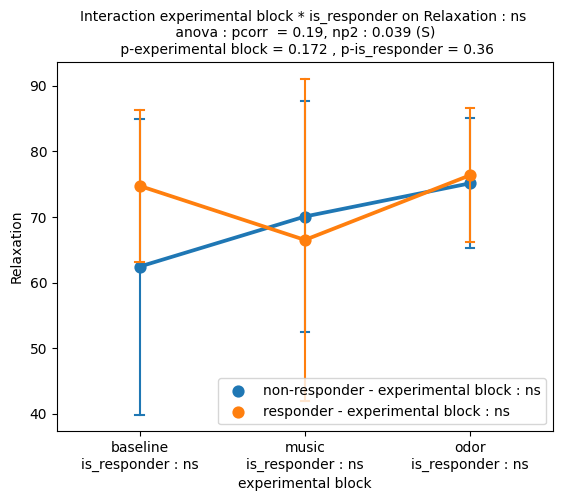

In [26]:
fig, ax = plt.subplots()

gh.auto_stats(df = relaxation,
              ax=ax,
              predictor = ['experimental block','is_responder'],
              outcome = 'Relaxation', 
              design = 'between',
              subject = 'participant',
             )

# fig.savefig(save_folder / 'effet_responders_sur_relaxation_item_bizarre.png', dpi = 500, bbox_inches = 'tight')

<AxesSubplot: title={'center': 'Interaction experimental block * is_responder on Perceived_duration : ns \n anova : pcorr  = 0.703, np2 : 0.008 (VS) \n p-experimental block = 0.154 , p-is_responder = 0.353'}, xlabel='experimental block', ylabel='Perceived_duration'>

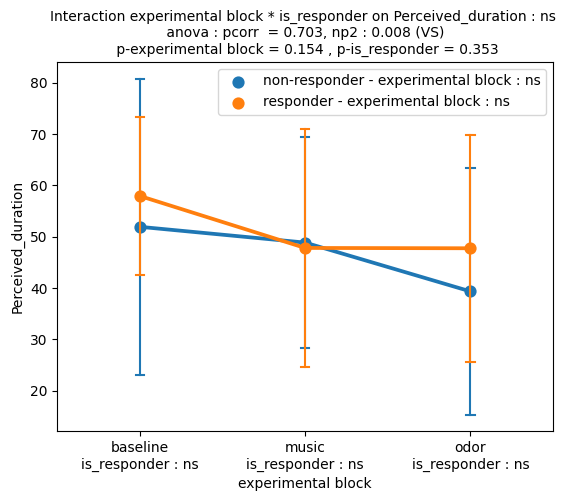

In [27]:
fig, ax = plt.subplots()

gh.auto_stats(df = relaxation,
              ax=ax,
              predictor = ['experimental block','is_responder'],
              outcome = 'Perceived_duration', 
              design = 'between',
              subject = 'participant',
             )

# fig.savefig(base_folder / 'Figures' / 'Autres' / 'effet_responders_sur_relaxation_item_bizarre.png', dpi = 500, bbox_inches = 'tight')

/home/valentin.ghibaudo/.virtualenvs/py3.10_nodegpu/lib/python3.10/site-packages/scipy/stats/_morestats.py:3337: UserWarning: Exact p-value calculation does not work if there are zeros. Switching to normal approximation.
  warnings.warn("Exact p-value calculation does not work if there are "


<AxesSubplot: title={'center': 'Effect of experimental block on Relaxation_intensity : ns \n N = 16 subjects \n friedman : p = 0.533'}, xlabel='experimental block', ylabel='Relaxation_intensity'>

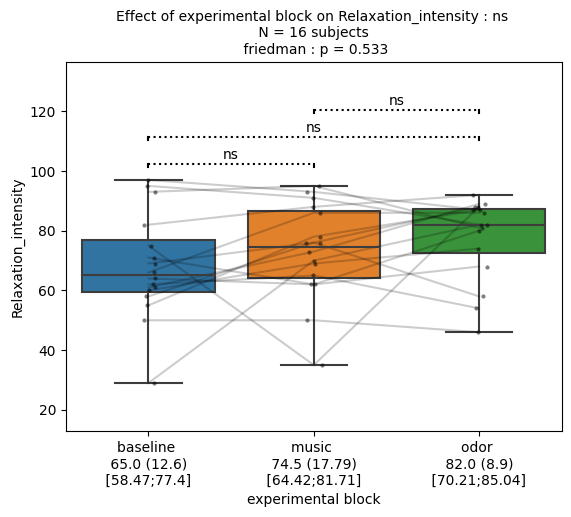

In [28]:
fig, ax = plt.subplots()

gh.auto_stats(df = relaxation[relaxation['is_responder'] == 'responder'],
              ax=ax,
              predictor = 'experimental block',
              outcome = 'Relaxation_intensity', 
              design = 'within',
              subject = 'participant',
             )

# fig.savefig(base_folder / 'Figures' / 'Autres' / 'effet_responders_sur_relaxation.png', dpi = 500, bbox_inches = 'tight')

<AxesSubplot: title={'center': 'Effect of experimental block on Relaxation_intensity : ns \n N = 14 subjects \n friedman : p = 0.185'}, xlabel='experimental block', ylabel='Relaxation_intensity'>

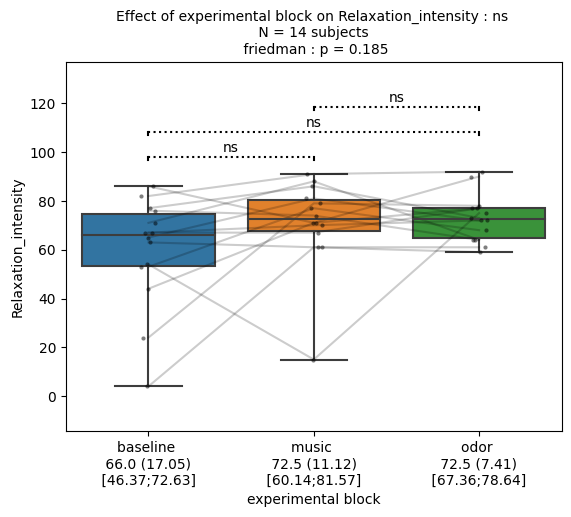

In [29]:
fig, ax = plt.subplots()

gh.auto_stats(df = relaxation[relaxation['is_responder'] == 'non-responder'],
              ax=ax,
              predictor = 'experimental block',
              outcome = 'Relaxation_intensity', 
              design = 'within',
              subject = 'participant',
             )

# fig.savefig(base_folder / 'Figures' / 'Autres' / 'effet_responders_sur_relaxation.png', dpi = 500, bbox_inches = 'tight')

### OAS & BMRQ

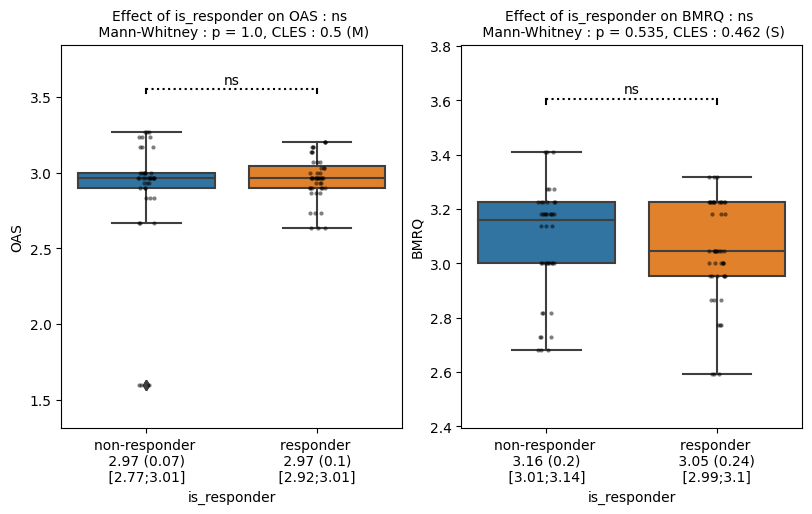

In [30]:
fig, axs = plt.subplots(ncols = 2, figsize = (8,5), constrained_layout = True)

for c, metric in enumerate(['OAS','BMRQ']):
    ax = axs[c]
    gh.auto_stats(df = relaxation,
                  ax=ax,
                  predictor = 'is_responder',
                  outcome = metric,
                  design = 'between',
                  subject = 'participant',
                 )
    
fig.savefig(save_folder / 'effet_is_responder_sur_oas_et_bmrq.png', bbox_inches = 'tight', dpi = 500)    

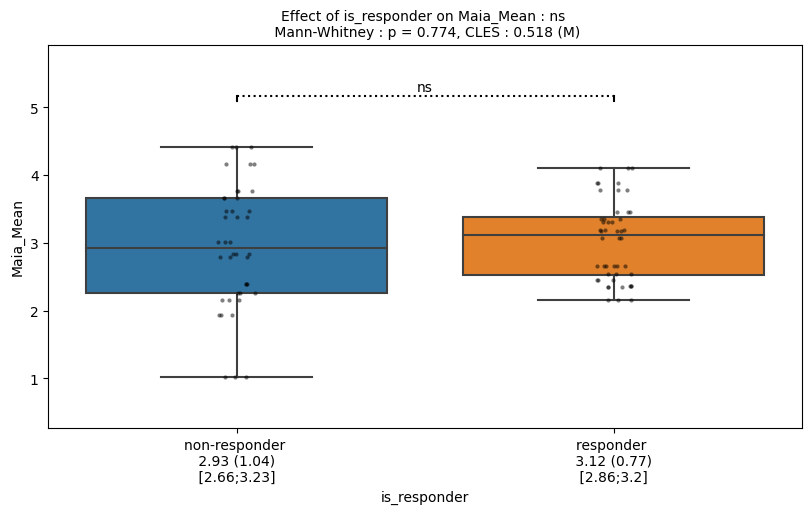

In [31]:
fig, ax = plt.subplots(figsize = (8,5), constrained_layout = True)

gh.auto_stats(df = relaxation,
              ax=ax,
              predictor = 'is_responder',
              outcome = 'Maia_Mean',
              design = 'between',
              subject = 'participant',
             )

fig.savefig(save_folder / 'effet_is_responder_maia_mean.png', bbox_inches = 'tight', dpi = 500)    

In [32]:
relaxation[relaxation['experimental block'] == 'baseline'].value_counts(subset = ['Gender','is_responder'])

Gender  is_responder 
F       responder        10
M       non-responder     8
F       non-responder     6
M       responder         6
Name: count, dtype: int64

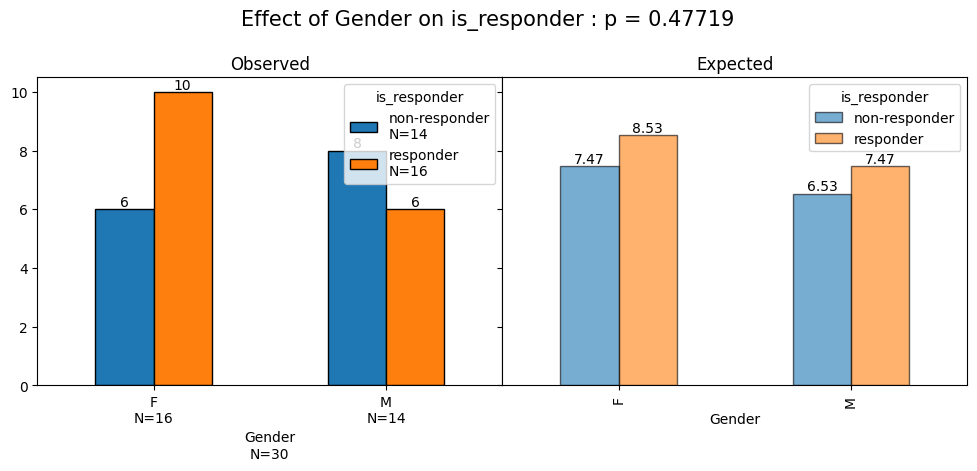

0.47719309397450665

In [33]:
save_file = save_folder / 'stats_responders_by_genre.png'
gh.stats_quali_quali(data = relaxation[relaxation['experimental block'] == 'baseline'], predictor = 'Gender', outcome = 'is_responder', save = save_file)

### Synthèse

/home/valentin.ghibaudo/.virtualenvs/py3.10_nodegpu/lib/python3.10/site-packages/scipy/stats/_morestats.py:3337: UserWarning: Exact p-value calculation does not work if there are zeros. Switching to normal approximation.
  warnings.warn("Exact p-value calculation does not work if there are "


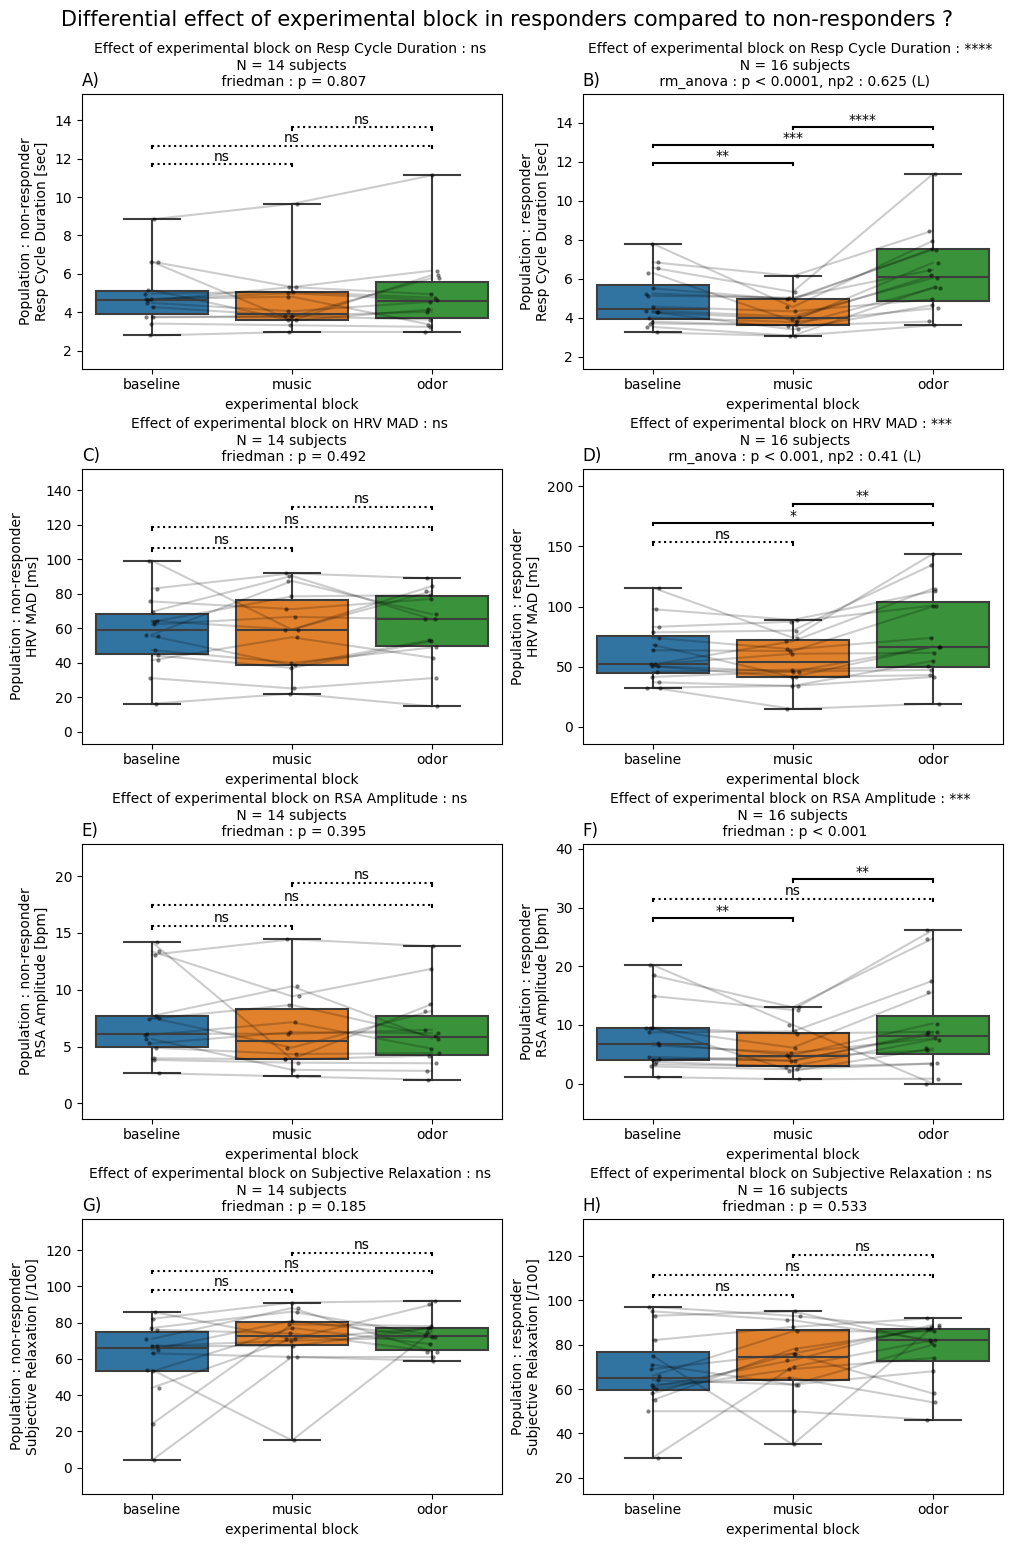

In [34]:
letters = gh.get_plot_letters()
counter = 0

fig, axs = plt.subplots(nrows = 4, ncols = 2, figsize = (10,15), constrained_layout = True)
fig.suptitle('Differential effect of experimental block in responders compared to non-responders ?', fontsize = 15, y = 1.02)

dfs = {'Respi':df_bis, 'HRV':hrv , 'RSA':rsa, 'Relaxation':relaxation}
metrics = {'Respi':'cycle_duration','HRV':'HRV_Mad', 'RSA':'decay_amplitude','Relaxation':'Relaxation_intensity'}
labels = {'Respi':'Resp Cycle Duration','HRV':'HRV MAD', 'RSA':'RSA Amplitude','Relaxation':'Subjective Relaxation'}
units = {'Respi':'sec','HRV':'ms', 'RSA':'bpm','Relaxation':'/100'}


for r, df_key in enumerate(dfs.keys()):
    for c, is_rep in enumerate(hrv['is_responder'].unique()):
        
        ax = axs[r,c]
        letter =  letters[counter]
        counter += 1
        
        df = dfs[df_key]
        metric = metrics[df_key]
        label = labels[df_key]
        unit = units[df_key]
        
        df_is_rep = df[df['is_responder'] == is_rep]
        
        gh.auto_stats(df = df_is_rep, 
                      predictor = 'experimental block', 
                      outcome = metric, 
                      design = 'within', 
                      ax=ax, 
                      subject = 'participant',
                      outcome_unit = unit,
                      outcome_clean_label = label,
                     xtick_info = False)
        
        ax.set_ylabel('Population : {}\n{}'.format(is_rep, ax.get_ylabel()))
        ax2 = ax.twinx()
        ax2.set_title(letter, loc = 'left')
        ax2.axis('off')
        
fig.savefig(save_folder / 'synthèse_effet_session_rep_norep_boxplots.png', bbox_inches = 'tight', dpi = 500)

## NEURO

In [35]:
from compute_global_dataframes import modulation_cycle_signal_concat_job
import mne
from bibliotheque import get_pos, init_nan_da, df_baseline, get_df_mask_chan_signif, keep_clean, cluster_stats
import xarray as xr
import ghibtools as gh

In [36]:
neuro = modulation_cycle_signal_concat_job.get(global_key).to_dataframe()
neuro = modulation_cycle_signal_concat_job.get(global_key).to_dataframe()
metrics = ['amplitude']
neuro = keep_clean(df_raw = neuro, metrics_to_clean = metrics)
neuro = neuro.iloc[:,1:]

In [37]:
neuro['is_responder'] = neuro['participant'].map(mapper_responder)
neuro = neuro.rename(columns = rename_col)

In [38]:
neuro

,participant,experimental block,chan,amplitude,stai_state,stai_trait,keep_session,Gender,Maia_Mean,OAS,BMRQ,is_responder
0,P01,baseline,Fp1,0.000002,40,61,1,F,1.019643,2.666667,2.727273,non-responder
1,P01,baseline,Fz,0.000003,40,61,1,F,1.019643,2.666667,2.727273,non-responder
2,P01,baseline,F3,0.000003,40,61,1,F,1.019643,2.666667,2.727273,non-responder
3,P01,baseline,F7,0.000003,40,61,1,F,1.019643,2.666667,2.727273,non-responder
4,P01,baseline,FT9,0.000004,40,61,1,F,1.019643,2.666667,2.727273,non-responder
...,...,...,...,...,...,...,...,...,...,...,...,...
2875,P31,odor,FC2,0.000003,29,40,1,M,2.790774,2.933333,2.681818,non-responder
2876,P31,odor,F4,0.000005,29,40,1,M,2.790774,2.933333,2.681818,non-responder
2877,P31,odor,F8,0.000007,29,40,1,M,2.790774,2.933333,2.681818,non-responder
2878,P31,odor,Fp2,0.000005,29,40,1,M,2.790774,2.933333,2.681818,non-responder


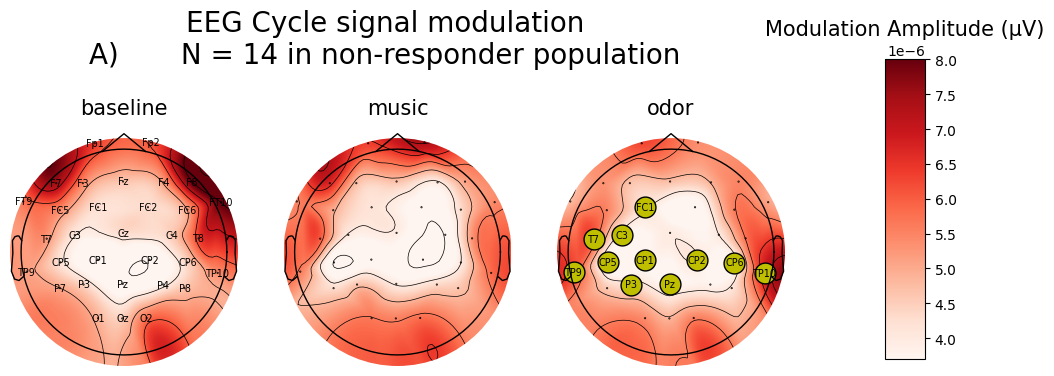

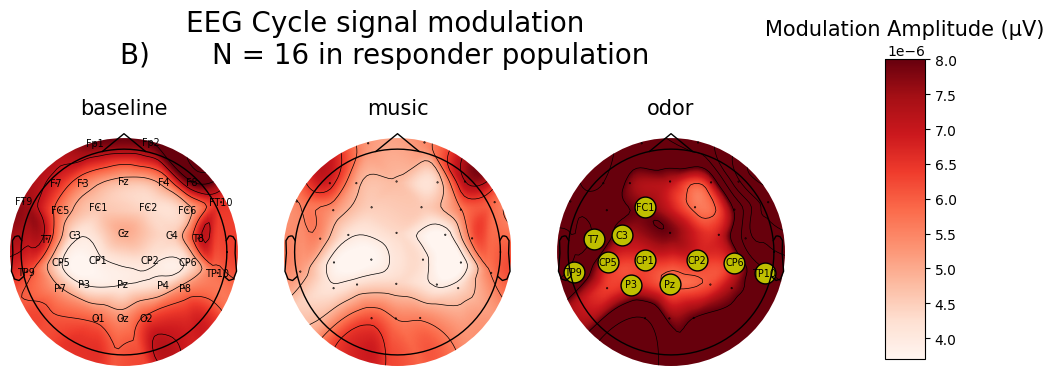

In [39]:
pos =get_pos()
df = neuro.copy()
def cluster_stats(x1,x2, chans, verbose = False):
    X = x2 - x1
    t_obs, clusters, cluster_p_values, H0 = mne.stats.permutation_cluster_1samp_test(X, out_type = 'indices', verbose = False)
    
    if verbose:
        print(clusters, cluster_p_values)

    mask_signif_chans = np.full(len(ch_names), False)

    chan_inds_signif = []
    for cluster, p  in zip(clusters, cluster_p_values):
        if p < 0.05:
            chan_inds_signif.extend(list(cluster[0]))
    mask_signif_chans[chan_inds_signif] = True
    return  mask_signif_chans

metric = 'amplitude'

ch_names = df['chan'].unique()
da = gh.init_da({'experimental_block':df['experimental block'].unique(), 'participant':df['participant'].unique(), 'chan':ch_names})
for ses in da['experimental_block'].values:
    for participant in da['participant'].values:
        for chan in da['chan'].values:
            da.loc[ses,participant,chan] = df.set_index(['experimental block','participant','chan']).loc[(ses,participant,chan),metric]
            
q_diff = 0.05

mask_params = dict(markersize=15, markerfacecolor='y')

vmin = df.groupby(['experimental block','chan']).median(numeric_only = True)[metric].quantile(q_diff)
vmax = df.groupby(['experimental block','chan']).median(numeric_only = True)[metric].quantile(1 - q_diff)

letters = ['A)','B)']

for i, is_rep in enumerate(neuro['is_responder'].unique()):
    df_rep = df[df['is_responder'] == is_rep]

    N = df_rep['participant'].unique().size

    fig, axs = plt.subplots(ncols = df_rep['experimental block'].unique().size, figsize = (10,5))
    letter = letters[i]
    fig.suptitle(f'EEG Cycle signal modulation\n{letter}       N = {N} in {is_rep} population', fontsize = 20, y = 1)

    chans = da['chan'].values

    for c, experimental_block in enumerate(df_rep['experimental block'].unique()):
        ax = axs[c]
        topo_data = df_rep[df_rep['experimental block'] == experimental_block].groupby('chan').median(numeric_only = True)[metric].reindex(chans)
        if experimental_block == 'baseline':
            im, cn = mne.viz.plot_topomap(data = topo_data.values , pos = pos, names = chans, axes = ax, show = False, vlim = (vmin,vmax))
        else:
            x1 = da.sel(experimental_block= 'baseline').values
            x2 = da.sel(experimental_block = experimental_block).values
            mask = cluster_stats(x1,x2,chans)
            im, cn = mne.viz.plot_topomap(data = topo_data.values , pos = pos, names = chans, axes = ax, show = False, vlim = (vmin,vmax), mask = mask, mask_params = mask_params)
        ax.set_title(f'{experimental_block}', fontsize = 15)

    ax_x_start = 1
    ax_x_width = 0.04
    ax_y_start = 0.3
    ax_y_height = 0.6
    cbar_ax = fig.add_axes([ax_x_start, ax_y_start, ax_x_width, ax_y_height])
    clb = fig.colorbar(im, cax=cbar_ax)
    clb.ax.set_title('Modulation Amplitude (µV)',fontsize=15)

    # fig.savefig(save_folder / f'neuro_modulation_in_{is_rep}.png', dpi = 500, bbox_inches = 'tight')

    plt.show()

In [40]:
def df_baseline(df, indexes, metrics, mode = 'ratio'):
    odor = df[df['experimental block'] == 'odor'].set_index(indexes)
    music = df[df['experimental block'] == 'music'].set_index(indexes)
    baseline = df[df['experimental block'] == 'baseline'].set_index(indexes)
    
    if mode == 'ratio':
        data_odor = odor[metrics].values / baseline[metrics].values
        data_music = music[metrics].values / baseline[metrics].values
    elif mode == 'substract':
        data_odor = odor[metrics].values - baseline[metrics].values
        data_music = music[metrics].values - baseline[metrics].values
    
    df_odor = pd.DataFrame(data = data_odor, columns = metrics, index = odor.index)
    df_odor['experimental block'] = 'odor'
    df_music = pd.DataFrame(data = data_music, columns = metrics, index = music.index)
    df_music['experimental block'] = 'music'
    
    return pd.concat([df_odor, df_music]).reset_index()

In [41]:
def cluster_stats_indep(x1,x2, chans, verbose = False):
    X = [x1, x2]
    F_obs, clusters, cluster_p_values, H0 = mne.stats.permutation_cluster_test(X, out_type = 'indices', verbose = False)
    
    if verbose:
        print(clusters, cluster_p_values)

    mask_signif_chans = np.full(len(ch_names), False)

    chan_inds_signif = []
    for cluster, p  in zip(clusters, cluster_p_values):
        if p < 0.05:
            chan_inds_signif.extend(list(cluster[0]))
    mask_signif_chans[chan_inds_signif] = True
    return  mask_signif_chans

In [42]:
neuro_baselined = df_baseline(df = neuro, indexes = ['participant','chan','is_responder'], metrics = ['amplitude'] , mode = 'ratio')
df = neuro_baselined.copy()
df['amplitude'] = np.log(df['amplitude'])

/tmp/ipykernel_53274/2035690116.py:3: RuntimeWarning: Ignoring argument "tail", performing 1-tailed F-test
  F_obs, clusters, cluster_p_values, H0 = mne.stats.permutation_cluster_test(X, out_type = 'indices', verbose = False)
/tmp/ipykernel_53274/2035690116.py:3: RuntimeWarning: No clusters found, returning empty H0, clusters, and cluster_pv
  F_obs, clusters, cluster_p_values, H0 = mne.stats.permutation_cluster_test(X, out_type = 'indices', verbose = False)


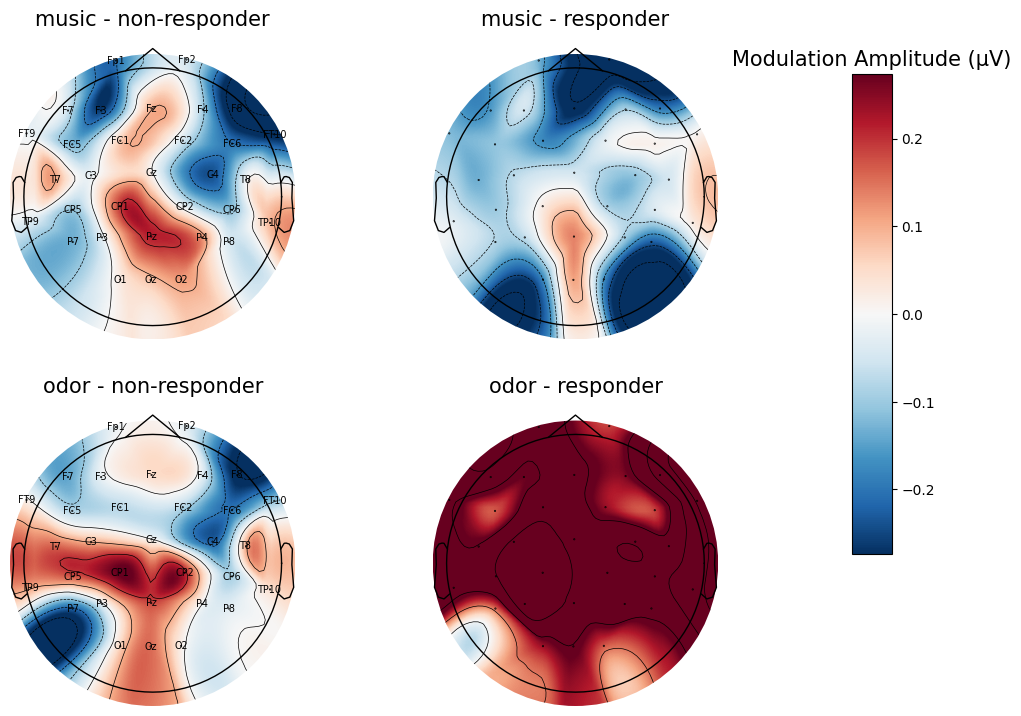

In [43]:
pos =get_pos()

metric = 'amplitude'

q_diff = 0.05

mask_params = dict(markersize=15, markerfacecolor='y')

vmin = df.groupby(['experimental block','chan']).median(numeric_only = True)[metric].quantile(q_diff)
vmax = df.groupby(['experimental block','chan']).median(numeric_only = True)[metric].quantile(1 - q_diff)

vmin = -vmax if vmax > np.abs(vmin) else vmin
vmax = vmax if vmax > np.abs(vmin) else np.abs(vmin)

letters = ['A)','B)']

blocks = ['music','odor']

is_responder = df['is_responder'].unique()

fig, axs = plt.subplots(nrows = len(blocks), ncols = is_responder.size, figsize = (10,8))
# fig.suptitle(f'EEG Cycle signal modulation\n{letter}       N = {N} in {is_rep} population', fontsize = 20, y = 1)
chans = da['chan'].values

cmap = 'RdBu_r'

ax = axs[0,0]
block = 'music'
rep = 'non-responder'
mask_data = (df['experimental block'] == block) & (df['is_responder'] == rep)
topo_data = df[mask_data].groupby('chan').median(numeric_only = True)[metric].reindex(chans)
im, cn = mne.viz.plot_topomap(data = topo_data.values , pos = pos, names = chans, axes = ax, show = False, vlim = (vmin,vmax), cmap=cmap)
ax.set_title(f'{block} - {rep}', fontsize = 15)

ax = axs[0,1]
block = 'music'
rep = 'responder'
mask_data = (df['experimental block'] == block) & (df['is_responder'] == rep)
topo_data = df[mask_data].groupby('chan').median(numeric_only = True)[metric].reindex(chans)
x1 = df[(df['experimental block'] == 'music') & (df['is_responder'] == 'non-responder')].pivot(columns = 'chan', index = 'participant', values = 'amplitude').loc[:,chans].values
x2 = df[(df['experimental block'] == 'music') & (df['is_responder'] == 'responder')].pivot(columns = 'chan', index = 'participant', values = 'amplitude').loc[:,chans].values
mask_stats = cluster_stats_indep(x1,x2,chans)
im, cn = mne.viz.plot_topomap(data = topo_data.values , pos = pos, names = chans, axes = ax, show = False, vlim = (vmin,vmax), cmap=cmap, mask = mask_stats, mask_params = mask_params)
ax.set_title(f'{block} - {rep}', fontsize = 15)

ax = axs[1,0]
block = 'odor'
rep = 'non-responder'
mask_data = (df['experimental block'] == block) & (df['is_responder'] == rep)
topo_data = df[mask_data].groupby('chan').median(numeric_only = True)[metric].reindex(chans)
im, cn = mne.viz.plot_topomap(data = topo_data.values , pos = pos, names = chans, axes = ax, show = False, vlim = (vmin,vmax), cmap = cmap)
ax.set_title(f'{block} - {rep}', fontsize = 15)

ax = axs[1,1]
block = 'odor'
rep = 'responder'
mask_data = (df['experimental block'] == block) & (df['is_responder'] == rep)
topo_data = df[mask_data].groupby('chan').median(numeric_only = True)[metric].reindex(chans)
x1 = df[(df['experimental block'] == 'odor') & (df['is_responder'] == 'non-responder')].pivot(columns = 'chan', index = 'participant', values = 'amplitude').loc[:,chans].values
x2 = df[(df['experimental block'] == 'odor') & (df['is_responder'] == 'responder')].pivot(columns = 'chan', index = 'participant', values = 'amplitude').loc[:,chans].values
im, cn = mne.viz.plot_topomap(data = topo_data.values , pos = pos, names = chans, axes = ax, show = False, vlim = (vmin,vmax), cmap = cmap, mask = mask_stats, mask_params = mask_params)
ax.set_title(f'{block} - {rep}', fontsize = 15)


ax_x_start = 1
ax_x_width = 0.04
ax_y_start = 0.3
ax_y_height = 0.6
cbar_ax = fig.add_axes([ax_x_start, ax_y_start, ax_x_width, ax_y_height])
clb = fig.colorbar(im, cax=cbar_ax)
clb.ax.set_title('Modulation Amplitude (µV)',fontsize=15)

# fig.savefig(save_folder / f'neuro_modulation_in_{is_rep}.png', dpi = 500, bbox_inches = 'tight')

plt.show()

<AxesSubplot: title={'center': 'Interaction experimental block * is_responder on Mean EEG Modulation Amplitude : ns \n anova : pcorr  = 0.171, np2 : 0.041 (S) \n p-experimental block < 0.01 , p-is_responder = 0.128'}, xlabel='experimental block', ylabel='Mean EEG Modulation Amplitude [µV]'>

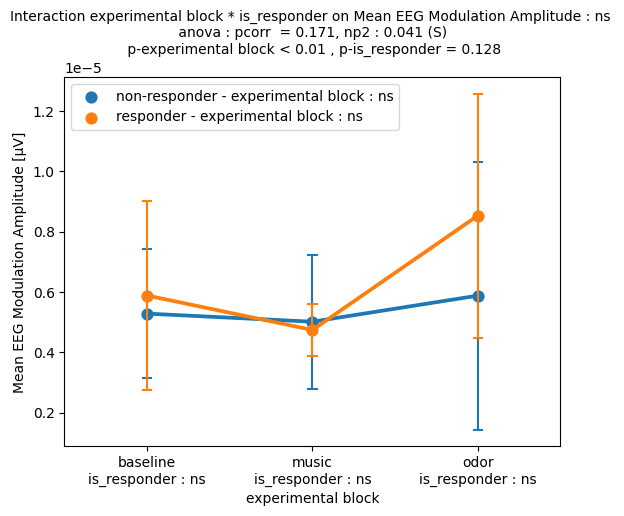

In [44]:
df = neuro.copy()

fig, ax = plt.subplots()

gh.auto_stats(df = df.groupby(['participant','experimental block','is_responder']).median(True).reset_index(),
              ax=ax,
              predictor = ['experimental block','is_responder'],
              outcome = 'amplitude', 
              design = 'between',
              subject = 'participant',
              outcome_clean_label = 'Mean EEG Modulation Amplitude',
              outcome_unit = 'µV',
              multicomp_correction = True
             )

# fig.savefig(save_folder / 'effet_responders_sur_eeg_modulation.png', dpi = 500, bbox_inches = 'tight')

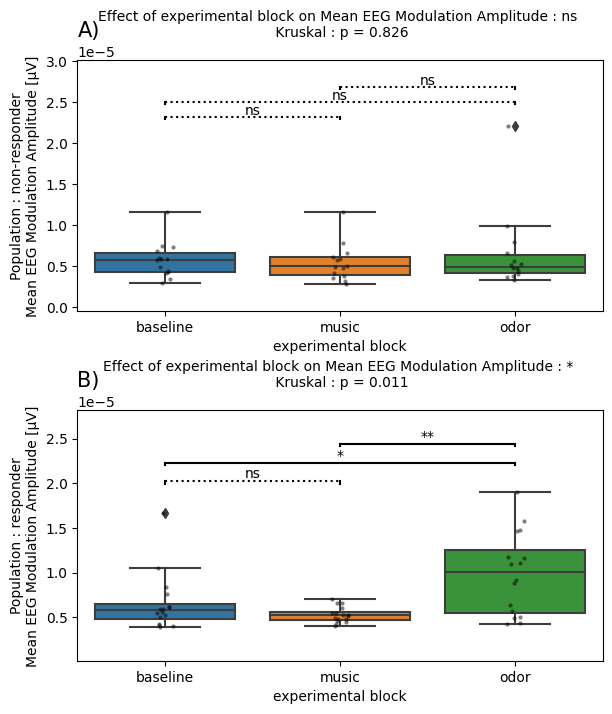

In [45]:
df = neuro.copy()

fig, axs = plt.subplots(nrows = len(is_responder), figsize = (6,7), constrained_layout = True)

letters = gh.get_plot_letters()

for r, rep in enumerate(df['is_responder'].unique()):
    ax = axs[r]
    letter = letters[r]
    
    df_sel = df[df['is_responder'] == rep]
    
    df_stats = df_sel.groupby(['participant','experimental block']).mean(True).reset_index()
    
    gh.auto_stats(df = df_stats,
                  ax=ax,
                  predictor = 'experimental block',
                  outcome = 'amplitude', 
                  design = 'between',
                  subject = 'participant',
                  outcome_clean_label = 'Mean EEG Modulation Amplitude',
                  outcome_unit = 'µV',
                  xtick_info = False,
                  transform = False
                 )
    ax.set_ylabel(f'Population : {rep}\n{ax.get_ylabel()}')
    ax2 = ax.twinx()
    ax2.axis('off')
    ax2.set_title(letter, loc = 'left', fontsize = 15)

fig.savefig(save_folder / 'effet_responders_sur_eeg_modulation_separated.png', dpi = 500, bbox_inches = 'tight')

### PHASE FREQ

In [46]:
from compute_phase_freq import phase_freq_concat_job

In [47]:
concat = []
for chan in chans:
    concat.append(phase_freq_concat_job.get(chan)['phase_freq_concat'].sel(compress_cycle_mode = 0.75))


In [48]:
phase_freq = xr.concat(concat, dim = 'chan')
phase_freq = phase_freq.assign_coords({'chan':chans})

In [49]:
phase_freq

<xarray.DataArray 'phase_freq_concat' (chan: 32, participant: 30, session: 3,
                                       freq: 85, phase: 200)>
array([[[[[ 1.07138416e+00,  1.06985610e+00,  1.07795067e+00, ...,
            1.12739153e+00,  1.15309452e+00,  1.19652488e+00],
          [ 9.40071543e-01,  9.57202920e-01,  9.85400724e-01, ...,
            9.75602751e-01,  1.02269823e+00,  1.06191885e+00],
          [            nan,             nan,             nan, ...,
                       nan,             nan,             nan],
          ...,
          [ 9.15844745e-01,  9.36303841e-01,  9.84228414e-01, ...,
            1.09998437e+00,  1.01200112e+00,  1.06054156e+00],
          [ 1.05510224e+00,  1.06086463e+00,  1.01332415e+00, ...,
            1.16176883e+00,  1.12512441e+00,  1.08790384e+00],
          [ 9.21158084e-01,  8.76747233e-01,  9.81944630e-01, ...,
            1.23406013e+00,  1.10758234e+00,  9.56736042e-01]],

         [[ 5.22304746e+00,  5.28172940e+00,  5.25137100e+00, ...,
            5.44026047e+00,  5.33463637e+00,  5.26000808e+00],
          [ 5.83018263e+00,  5.89638522e+00,  5.78588295e+00, ...,
            5.39957235e+00,  5.49816047e+00,  5.61489913e+00],
          [            nan,             nan,             nan, ...,
                       nan,             nan,             nan],
...
          [-5.46217160e-02,  4.01297074e-03,  7.03039203e-02, ...,
           -2.14879645e-02, -1.22045486e-02, -1.45268953e-04],
          [-6.70812041e-02, -1.22540694e-01,  4.04552565e-02, ...,
           -5.16966954e-02,  8.42857967e-03,  6.57211372e-02],
          [ 2.62660383e-03,  1.13238202e-01,  7.25888674e-02, ...,
            6.92885593e-02,  3.31096361e-02,  8.67695679e-02]],

         [[ 3.14439428e-01,  3.59623243e-01,  3.54593977e-01, ...,
            4.90543473e-01,  5.20396278e-01,  4.81211891e-01],
          [ 2.88135536e-01,  3.15931749e-01,  3.00073801e-01, ...,
            4.01136548e-01,  4.05186585e-01,  4.55665546e-01],
          [            nan,             nan,             nan, ...,
                       nan,             nan,             nan],
          ...,
          [ 5.33468685e-01,  4.13441078e-01,  4.20597180e-01, ...,
            2.96066915e-01,  3.66592671e-01,  4.86292021e-01],
          [ 6.53715519e-01,  5.99249106e-01,  6.31650070e-01, ...,
            5.42772883e-01,  5.77539855e-01,  5.37927898e-01],
          [ 7.73683682e-01,  7.20664829e-01,  7.89569632e-01, ...,
            6.58063602e-01,  5.60563681e-01,  7.38441150e-01]]]]])
Coordinates:
  * participant          (participant) object 'P01' 'P02' 'P03' ... 'P30' 'P31'
  * session              (session) object 'baseline' 'music' 'odor'
  * freq                 (freq) float64 4.0 4.098 4.199 ... 18.97 19.44 19.92
  * phase                (phase) float64 0.0 0.005025 0.01005 ... 0.995 1.0
    compress_cycle_mode  float64 0.75
  * chan                 (chan) object 'Fp1' 'Fz' 'F3' 'F7' ... 'F8' 'Fp2' 'Cz'

<AxesSubplot: xlabel='participant'>

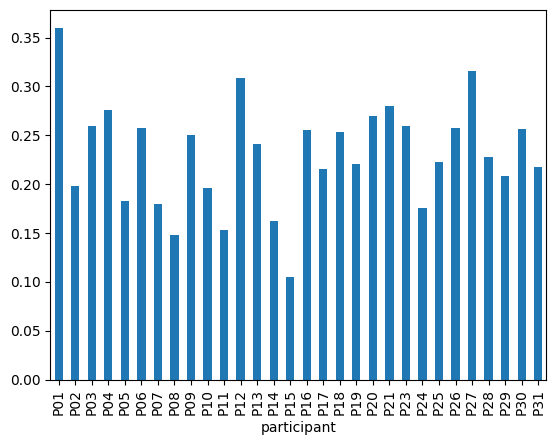

In [50]:
df_bis.groupby('participant').mean(True)['cycle_freq'].plot.bar()

In [51]:
pf = phase_freq_concat_job.get('CP2')['phase_freq_concat'].sel(compress_cycle_mode = 0.75)

In [52]:
phase_freq_redépondeurs = pf.sel(participant = repondeurs)
phase_freq_non_redépondeurs = pf.sel(participant = non_repondeurs)

In [53]:
pf_rep_no_rep = xr.concat([phase_freq_redépondeurs.mean('participant'), phase_freq_non_redépondeurs.mean('participant')], dim = 'is_responder')

In [54]:
pf_rep_no_rep = pf_rep_no_rep.assign_coords({'is_responder':['responders','non-responders']})

In [55]:
pf_rep_no_rep

<xarray.DataArray 'phase_freq_concat' (is_responder: 2, session: 3, freq: 67,
                                       phase: 200)>
array([[[[1.07840717, 1.07275323, 1.07682905, ..., 1.0233198 ,
          1.02506389, 1.07406328],
         [1.09759867, 1.07154468, 1.06381195, ..., 1.05311633,
          1.02778375, 1.0364751 ],
         [1.13886616, 1.1205035 , 1.1119182 , ..., 1.0657472 ,
          1.0849402 , 1.0849536 ],
         ...,
         [1.1755814 , 1.19024936, 1.16458248, ..., 1.13183492,
          1.18096578, 1.19337848],
         [1.15197748, 1.18502686, 1.13564014, ..., 1.13710529,
          1.12148908, 1.12295481],
         [1.09237837, 1.04284987, 1.07064784, ..., 1.11417205,
          1.13314225, 1.1226976 ]],

        [[1.12936456, 1.13293005, 1.11924558, ..., 1.14204375,
          1.15218473, 1.15160125],
         [1.16601471, 1.15660859, 1.15893989, ..., 1.13036815,
          1.13309127, 1.15056002],
         [1.21569867, 1.22600689, 1.21993717, ..., 1.20219111,
          1.17721087, 1.18690191],
...
         [1.91229746, 1.92600394, 1.99791842, ..., 1.90867558,
          1.97172294, 1.99632905],
         [1.91855037, 1.99436036, 2.00122181, ..., 1.92268163,
          1.88588995, 1.89959125],
         [1.95741676, 2.0241809 , 2.06241481, ..., 1.95438124,
          1.93767243, 1.91888126]],

        [[3.21870704, 3.20521526, 3.14573989, ..., 3.48319579,
          3.4313674 , 3.40999162],
         [3.35268763, 3.29210992, 3.24789443, ..., 3.61130533,
          3.53607784, 3.44202443],
         [3.31619664, 3.38544964, 3.36970449, ..., 3.56550071,
          3.58231314, 3.53232805],
         ...,
         [2.36164464, 2.35777146, 2.32460862, ..., 2.51097086,
          2.47963255, 2.37207241],
         [2.35061351, 2.3504907 , 2.39288042, ..., 2.43560756,
          2.4376426 , 2.42555988],
         [2.464478  , 2.44452027, 2.53988773, ..., 2.53812781,
          2.49285932, 2.48582376]]]])
Coordinates:
  * session              (session) object 'baseline' 'music' 'odor'
    compress_cycle_mode  float64 0.75
  * freq                 (freq) float64 4.0 4.098 4.199 ... 18.97 19.44 19.92
  * phase                (phase) float64 0.0 0.005025 0.01005 ... 0.995 1.0
  * is_responder         (is_responder) <U14 'responders' 'non-responders'

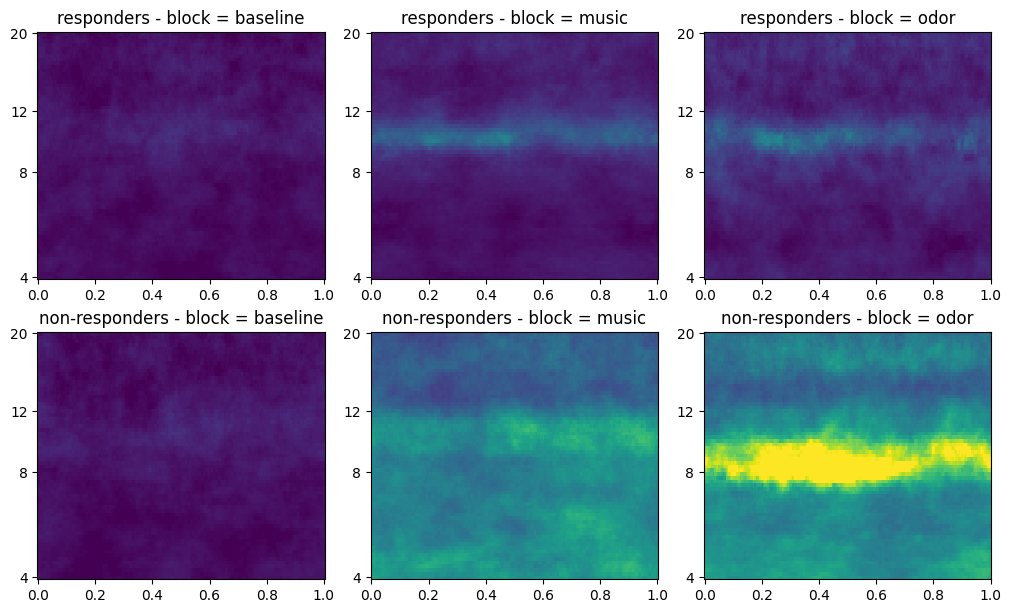

In [56]:
p = pf_rep_no_rep['phase'].values
f = pf_rep_no_rep['freq'].values

d = 0.01
vmin = pf_rep_no_rep.quantile(d)
vmax = pf_rep_no_rep.quantile(1-d)

yticks = [4, 8 , 12, 20]

fig, axs = plt.subplots(nrows = 2, ncols = 3, figsize = (10,6), constrained_layout = True)

for c, ses in enumerate(pf_rep_no_rep['session'].values):
    for r, rep in enumerate(pf_rep_no_rep['is_responder'].values):
        ax = axs[r,c]
        data = pf_rep_no_rep.loc[rep, ses,:,:].values
        ax.pcolormesh(p, f, data, vmin = vmin, vmax=vmax)
        ax.set_title(f'{rep} - block = {ses}')
        ax.set_yscale('log')
        ax.set_yticks(yticks, labels = yticks)
        ax.minorticks_off()
fig.savefig(save_folder / 'effet_responders_sur_eeg_alpha_modulation.png', dpi = 500, bbox_inches = 'tight')

## Delta resp freq to relaxation

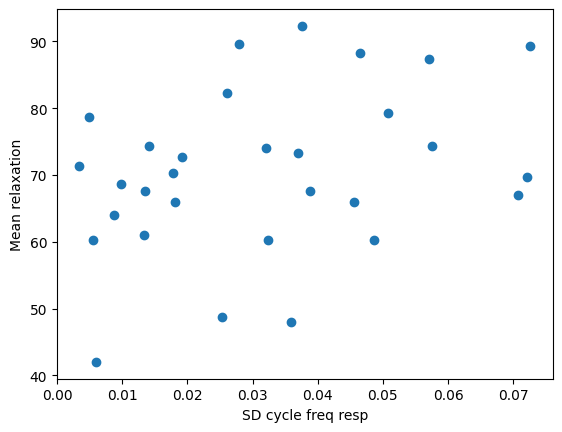

In [57]:
fig, ax = plt.subplots()
ax.scatter(df_bis.groupby('participant')['cycle_freq'].std(numeric_only = True),
           relaxation.groupby('participant')['Relaxation_intensity'].mean(numeric_only = True)
          )
ax.set_xlabel('SD cycle freq resp')
ax.set_ylabel('Mean relaxation')
fig.savefig(save_folder / 'variation_respi_to_relaxation.png', dpi = 500, bbox_inches = 'tight')
plt.show()